In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time
import tensorflow as tf
import numpy as np
import pandas as pd
import math


KeyError: "Registering two gradient with name 'ReduceDataset'! (Previous registration was in register /opt/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/registry.py:65)"

In [3]:
import pandas as pd


class Data:
    def __init__(self):
        pass

    def askforinputfile(self):
        self.filename = input("PLEASE ENTER THE NAME OF THE FILE WITHOUT EXTENSION==>")

    def read_file(self):
        df = pd.read_excel(
            "14days.xlsx",
            header=None,
            usecols="B:D",
            skiprows=1,
            sheet_name=[
                "ST10A",
                "ST10B",
                "ST20A",
                "ST20B",
                "ST30A",
                "ST30B",
                "ST40A",
                "ST40B",
                "ST50A",
                "ST50B",
                "ST60A",
                "ST60B",
                "ST71",
                "ST72",
                "ST80",
                "ST90",
                "ST91",
                "ST92",
                "ST100",
                "ST110",
                "ST120",
            ],
        )

        self.alldata = df
        return df

    def get_productivity_count(self, data, key):
        keys = ["ST80", "ST90", "ST91", "ST92", "ST100", "ST110", "ST120"]
        data.dropna(inplace=True)

        # GETTING START TIME
        startime = data.iloc[0, 0]

        # GETTING END TIME
        endtime = data.iloc[len(data) - 1, 0]

        # FUNCTION TO COUNT PRODUCTIVITY CODE WITHIN GIVEN SPECIFIED TIME
        def countproductivity(startime, secondtime):
            return len(
                data[
                    (data[1] >= startime)
                    & (data[1] < secondtime)
                    & (data[3] == "1 - Productive")
                ]
            )

        # INITIALIZING AN ARRAY
        self.par= []
        self.productivityarray = []
        self.timearray = []
        ignorestart = pd.Timestamp("2:30:00")
        ignoreend = pd.Timestamp("6:00:00")

        while startime < endtime:

            # if not (ignorestart.time() < startime.time() < ignoreend.time()):
                # SECOND TIME IS STARTIME + 1 HOUR
            secondtime = startime + pd.Timedelta(hours=1)
                # USING THE FUNCTION TO GET THE COUNT
                # a  = self.checkdate(startime)
                # if a:
            count = countproductivity(startime, secondtime)
            # self.par.append(count)
            # if key in keys:
            #     count = math.ceil((count/530)*100)
            # else:
            #     count = math.ceil((count/265)*100)
                    # INCREMENTING STARTIME BY 1 HOUR
                    # IF COUNT ==0 THEN SKIP

            self.productivityarray.append(count)
            self.timearray.append(secondtime)
            startime += pd.Timedelta(hours=0.5)
        # 179
        # 178
        
        return [self.productivityarray, self.timearray]

    def create_dataframeforsinglemachine(self, key):
        machinedata = self.alldata[key]

        a,b = self.get_productivity_count(machinedata, key)
        machinedataframe = pd.DataFrame(a, b)
        machinedataframe.reset_index(inplace=True)
        machinedataframe.columns = ["index", "Value"]

        return machinedataframe

    def dataforml(self):
        return [self.productivityarray, self.timearray]


In [3]:

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
        #    def windowed_dataset(self, series, window_size, batch_size, shuffle_buffer):
        """Generates dataset windows

        Args:
        series (array of float) - contains the values of the time series
        window_size (int) - the number of time steps to include in the feature
        batch_size (int) - the batch size
        shuffle_buffer(int) - buffer size to use for the shuffle method

        Returns:
        dataset (TF Dataset) - TF Dataset containing time windows
        """

        # Generate a TF Dataset from the series values
        dataset = tf.data.Dataset.from_tensor_slices(series)

        # Window the data but only take those with the specified size
        dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

        # Flatten the windows by putting its elements in a single batch
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

        # Create tuples with features and labels
        dataset = dataset.map(lambda window: (window[:-1], window[-1]))

        # Shuffle the windows
        dataset = dataset.shuffle(shuffle_buffer)

        # Create batches of windows
        dataset = dataset.batch(batch_size).prefetch(1)
        # print(len(dataset))

        
        return dataset
        
def create_dataset_for_ML(x_train, window_size, batch_size, shuffle_buffer_size):
        dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
        # print(dataset[0])
        return dataset

In [16]:
maindataobject14 = Data()
maindataobject14.read_file()
maindataobject14.create_dataframeforsinglemachine("ST10A")
pvalue14, time14 = maindataobject14.dataforml()

print(len(pvalue14))
print(len(time14))

672
672


In [163]:
# maindataobject4 = Data()
# maindataobject4.read_file()
maindataobject4.create_dataframeforsinglemachine("ST10A")
pvalue4, time4 = maindataobject4.dataforml()
print(len(pvalue4))

180


In [173]:
maindataobject1 = Data()
maindataobject1.read_file()
maindataobject1.create_dataframeforsinglemachine("ST10A")
pvalue1, time1 = maindataobject1.dataforml()
print(len(pvalue1))
print(len(time1))

36
36


In [17]:
# CREATE MORE DATA
p5 = pvalue14
t5 = time14
endtime = t5[len(t5)-1]
for x in range(672):
    p5.append(pvalue14[x])
    endtime+=pd.Timedelta(hours=0.5)
    t5.append(endtime)
    
    
    

In [18]:
print(len(pvalue14))

1344


In [13]:
print(len(p5))

2688


/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



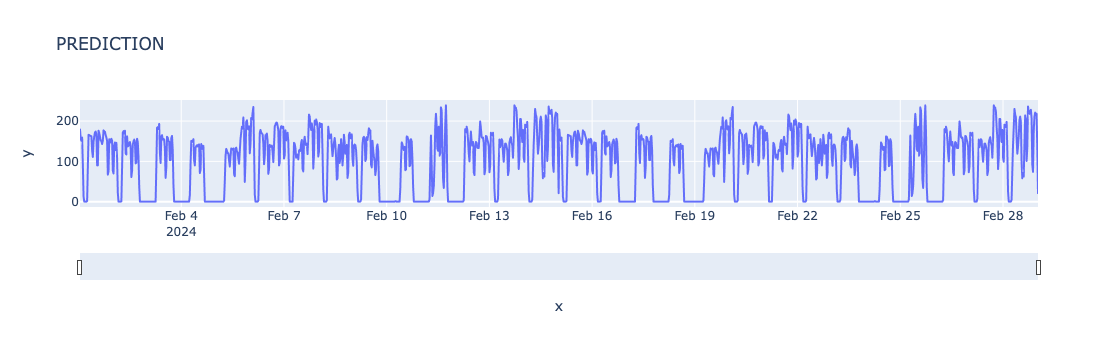

In [19]:
import plotly.express as px
# time_valid = np.array(time_valid)
# x_valid = np.array(x_valid)
    # creating a dataframe
# df = pd.DataFrame({"Time": time_valid, "Value": x_valid, "Result": results})
df = pd.DataFrame({"Time": p5, "Value":t5})
    # plotting the dataframe
# fig = px.line(df, x="Time", y=["Value", "Result"], title="PREDICTION")pvalue14, time14
fig = px.line(df, x=t5, y=p5, title="PREDICTION")
fig.update_xaxes(rangeslider_visible=True)

/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



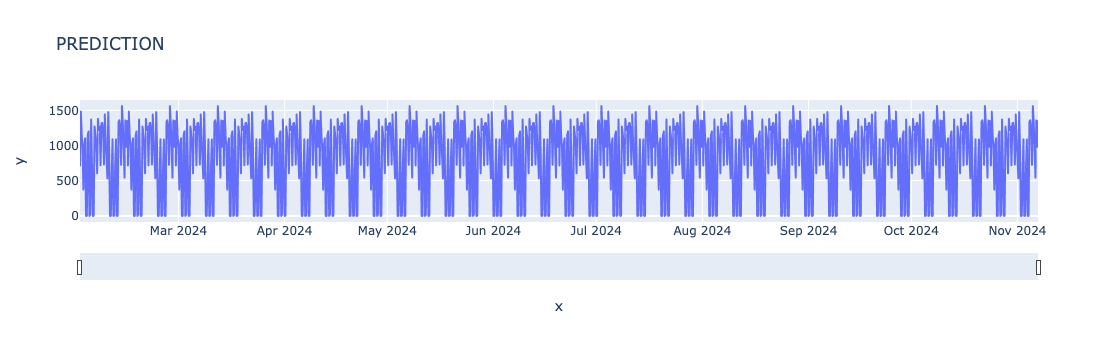

In [14]:
import plotly.express as px
time_valid = np.array(time_valid)
x_valid = np.array(x_valid)
    # creating a dataframe
df = pd.DataFrame({"Time": time_valid, "Value": x_valid, "Result": results})
    # plotting the dataframe
# fig = px.line(df, x="Time", y=["Value", "Result"], title="PREDICTION")pvalue14, time14
fig = px.line(df, x=time14, y=pvalue14, title="PREDICTION")
fig.update_xaxes(rangeslider_visible=True)

In [24]:
# [64, 59, 57, 60, 52, 55, 41, 41, 61, 58, 58, 59, 54, 2, 48, 40, 35, 46, 43, 44, 44, 42, 42, 50, 54, 62, 57, 47, 1, 59, 60, 47, 58, 54, 63, 13]
import tensorflow as tf
import numpy as np
import pandas as pd


class MlModel:
    def __init__(self, data, time):
        self.data = data
        self.time = time
        # Define the split time
        self.splittime = 1000

        # Get the train set
        self.time_train = self.time[: self.splittime]
        self.x_train = self.data[: self.splittime]

        # Get the validation set
        self.time_valid = self.time[self.splittime:]
        self.x_valid = self.data[self.splittime :]
        # print('================================================================')
        # print(self.x_valid)
        # print(self.time_valid)
        # print("-------------------------------------------------------")

        # Parameters
        self.window_size = 30
        self.batch_size = 20
        self.shuffle_buffer_size = 100

    def windowed_dataset(self, series, window_size, batch_size, shuffle_buffer):
        """Generates dataset windows

        Args:
        series (array of float) - contains the values of the time series
        window_size (int) - the number of time steps to include in the feature
        batch_size (int) - the batch size
        shuffle_buffer(int) - buffer size to use for the shuffle method

        Returns:
        dataset (TF Dataset) - TF Dataset containing time windows
        """

        # Generate a TF Dataset from the series values
        dataset = tf.data.Dataset.from_tensor_slices(series)

        # Window the data but only take those with the specified size
        dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

        # Flatten the windows by putting its elements in a single batch
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

        # Create tuples with features and labels
        dataset = dataset.map(lambda window: (window[:-1], window[-1]))

        # Shuffle the windows
        dataset = dataset.shuffle(shuffle_buffer)

        # Create batches of windows
        dataset = dataset.batch(batch_size).prefetch(1)
        # print(len(dataset))

        return dataset

    # Generate the dataset windows
    def create_dataseforML(self):
        self.dataset = self.windowed_dataset(
            self.x_train, self.window_size, self.batch_size, self.shuffle_buffer_size
        )

    def buildnetwork(self):

        self.model = tf.keras.models.Sequential(
            [

                    # tf.keras.layers.Dense(80, input_shape=[self.window_size], activation="relu"), 
                    # # tf.keras.layers.Dense(30,  activation="relu"), 
                    # tf.keras.layers.Dense(1)
                # =====================================================
                  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
                  tf.keras.layers.SimpleRNN(50, return_sequences=True),
                  tf.keras.layers.SimpleRNN(30, return_sequences=True),
                  tf.keras.layers.SimpleRNN(30, return_sequences=True),
                  tf.keras.layers.SimpleRNN(30),
                  tf.keras.layers.Dense(1),
                  tf.keras.layers.Lambda(lambda x: x * 100.0)
                # =====================================================
#                  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(625, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(528, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(258, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#               tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#               tf.keras.layers.Dense(50),
#               tf.keras.layers.Dense(1),
#               tf.keras.layers.Lambda(lambda x: x * 100.0)
                # ==========================================================
                  # tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                  #     strides=1, padding="causal",
                  #                     activation="relu",
                  #                     input_shape=[self.window_size, 1]),
                  # tf.keras.layers.LSTM(128, return_sequences=True),
                  # tf.keras.layers.LSTM(64, return_sequences=True),
                  # tf.keras.layers.LSTM(64, return_sequences=True),
                  # tf.keras.layers.LSTM(64),
                  # tf.keras.layers.Dense(1),
                  # tf.keras.layers.Lambda(lambda x: x * 400)
                # =============================================================\
              #     tf.keras.layers.Conv1D(filters=64, kernel_size=3,
              #         strides=1,
              #         activation="relu",
              #         padding='causal',
              #                     input_shape=[None]),
              #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(258, return_sequences=True)),
              #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
              #  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
              #  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
              #   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
              # tf.keras.layers.Dense(30, activation="relu"),
              # tf.keras.layers.Dense(10, activation="relu"),
              # tf.keras.layers.Dense(1),
              # tf.keras.layers.Lambda(lambda x: x * 400)
              # =======================================================================/==========
                                
            ]
        )

    def weightinformations(self):
        # Print the initial layer weights
        print("Layer weights: \n {} \n".format(self.l0.get_weights()))

    # Print the model summary
    def model_summary(self):
        self.model.summary()

    # Set the training parameters
    def model_training(self):

        # Set the learning rate
        learning_rate = 1e-6
        
        # Set the optimizer 
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        
        # Set the training parameters
        self.model.compile(loss="mae",
                      optimizer=optimizer,
                      metrics=["mae"])

        # Train the model
        self.model.fit(self.dataset, epochs=300)

    def model_forecast(self, steps=50):
        self.data = np.array(self.data)
        forecast = []

        # Use the model to predict data points per window size
        for time in range(len(self.data) - self.window_size + 1):  # Changed range limit

            # Append prediction to forecast list
            a = self.model.predict(
                self.data[time : time + self.window_size][np.newaxis]
            )

            forecast.append(a)
        forecast = forecast[
            self.splittime - self.window_size + 1 :
        ]  # No need to subtract window size
        forecast = np.array(forecast)

        forecast = forecast.squeeze()

        # # Slice the points that are aligned with the validation set
        # # print(forecast[0:5])
        # # print(len(forecast[0:4]))

        # # Extend forecast beyond the validation set
        # # forecast = np.array(forecast)
       
        endtime = self.time_valid[len(self.time_valid) - 1]
    
        

        for _ in range(steps):
            forecast = np.append(
                forecast, self.model.predict(forecast[-self.window_size :][np.newaxis])
            )
            endtime += pd.Timedelta(hours=0.5)
            self.time_valid.append(endtime)
            self.x_valid = np.append(self.x_valid, 0)

        self.results = forecast.squeeze()
        return [self.results, self.time_valid, self.x_valid]

    # Compute the metrics
    def model_error(self):
        # print(tf.keras.metrics.mean_squared_error(self.x_valid, self.results).numpy())
        print(tf.keras.metrics.mean_absolute_error(self.x_valid, self.results).numpy())


    def save_model(self, filepath="./models/moditmodel1"):
        # Save the model to the specified filepath
        self.model.save(filepath)


In [25]:
def load_model(filepath="./models/moditmodel1"):
        # Load the model from the specified filepath
        model = tf.keras.models.load_model(filepath)
        return model

In [26]:
ml = MlModel(p5, t5)
print("CREATING DATASET")
    # creates dataset
ml.create_dataseforML()
print("building network")
    # building network
ml.buildnetwork()
print("MODEL TRAINING")
    # training model
ml.model_training()
print("FORECASTING")

    # getting results, time_valid and x_valid
[results, time_valid, x_valid] = ml.model_forecast()
# ml.model_error()
# ml.save_model()

CREATING DATASET
building network
MODEL TRAINING
Epoch 1/300
49/49 [==============================] - 1s 6ms/step - loss: 59.5786 - mae: 59.5786
Epoch 2/300
49/49 [==============================] - 0s 5ms/step - loss: 43.8828 - mae: 43.8828
Epoch 3/300
49/49 [==============================] - 0s 5ms/step - loss: 39.7764 - mae: 39.7764
Epoch 4/300
49/49 [==============================] - 0s 6ms/step - loss: 37.2856 - mae: 37.2856
Epoch 5/300
49/49 [==============================] - 0s 5ms/step - loss: 35.6757 - mae: 35.6757
Epoch 6/300
49/49 [==============================] - 0s 5ms/step - loss: 34.0917 - mae: 34.0917
Epoch 7/300
49/49 [==============================] - 0s 6ms/step - loss: 33.2154 - mae: 33.2154
Epoch 8/300
49/49 [==============================] - 0s 5ms/step - loss: 32.5647 - mae: 32.5647
Epoch 9/300
49/49 [==============================] - 0s 5ms/step - loss: 32.0988 - mae: 32.0988
Epoch 10/300
49/49 [==============================] - 0s 6ms/step - loss: 31.6761 - mae

/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



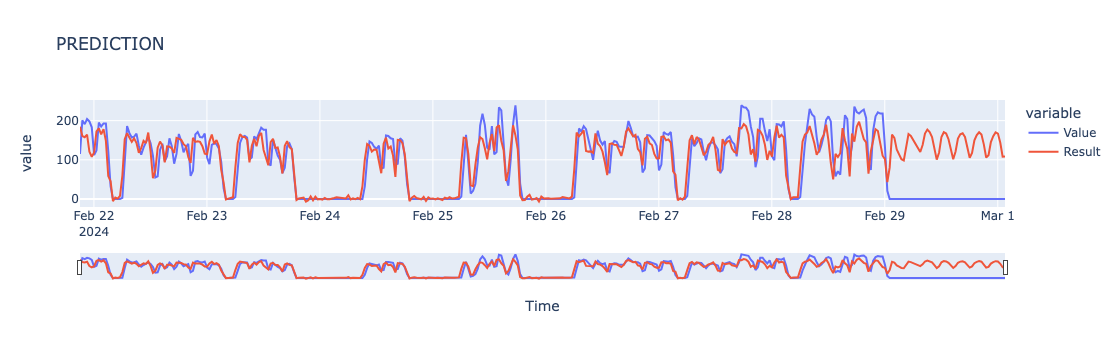

In [27]:
import plotly.express as px
time_valid = np.array(time_valid)
x_valid = np.array(x_valid)
    # creating a dataframe
df = pd.DataFrame({"Time": time_valid, "Value": x_valid, "Result": results})
    # plotting the dataframe
fig = px.line(df, x="Time", y=["Value", "Result"], title="PREDICTION")
# fig = px.line(df, x=time14, y=pvalue14, title="PREDICTION")
fig.update_xaxes(rangeslider_visible=True)

### smo = load_model()

In [87]:
maindataobject14.create_dataframeforsinglemachine("ST120")
pvalue14, time14 = maindataobject14.dataforml()
dataset14 = create_dataset_for_ML(pvalue14, 30, (len(pvalue14)//30)+50, 200)
# maindataobject4.create_dataframeforsinglemachine("ST10A")
# pvalue4, time4 = maindataobject4.dataforml()
# dataset4 = create_dataset_for_ML(pvalue4, 30, (len(pvalue4)//30)+50, 200)

In [88]:
smo.compile(
            loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9),metrics=["mae"]
        )
        # Train the model
smo.fit(dataset14, epochs=200)
smo.save("./models/moditmodel1")

Epoch 1/200
9/9 [==============================] - 0s 3ms/step - loss: 426.8080 - mae: 15.1384
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 348.4886 - mae: 14.2423
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 339.6874 - mae: 14.0031
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 266.6428 - mae: 12.6223
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 226.1496 - mae: 11.4190
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 212.0304 - mae: 11.3258
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 181.5066 - mae: 10.2524
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 171.3743 - mae: 10.0242
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 171.5365 - mae: 9.9358
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 158.8666 - mae: 9.6857
Epoch 11/200
9/9 [==============================] -

INFO:tensorflow:Assets written to: ./models/moditmodel1/assets


In [89]:
def model_forecast(model,data,window_size,time_valid,x_valid,steps=50):
        data = np.array(data)
        forecast = data

        # Use the model to predict data points per window size
        # for time in range(len(data) - window_size + 1):  # Changed range limit

        #     # Append prediction to forecast list
        #     a = model.predict(
        #         data[time : time + window_size][np.newaxis]
        #     )

        #     forecast.append(a)
        # # forecast = forecast[
        # #     splittime - window_size + 1 :
        # # ]  # No need to subtract window size
        # forecast = np.array(forecast)

        # forecast = forecast.squeeze()

        # # Slice the points that are aligned with the validation set
        # # print(forecast[0:5])
        # # print(len(forecast[0:4]))

        # # Extend forecast beyond the validation set
        # # forecast = np.array(forecast)

        endtime = time_valid[len(time_valid) - 1]

        for _ in range(steps):
            forecast = np.append(
                forecast, model.predict(forecast[-window_size :][np.newaxis])
            )
            endtime += pd.Timedelta(hours=0.5)
            time_valid.append(endtime)
            x_valid = np.append(x_valid, 0)

        results = forecast.squeeze()
        return [results, time_valid, x_valid]

In [98]:
# maindataobject1 = Data()
# maindataobject1.read_file()
maindataobject1.create_dataframeforsinglemachine("ST110")
pvalue1, time1 = maindataobject1.dataforml()
# print(len(pvalue14))

In [99]:
[results, time_valid, x_valid] = model_forecast(smo, pvalue1, 30, time1, pvalue1)

1/1 [==============================] - 0s 6ms/step


/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



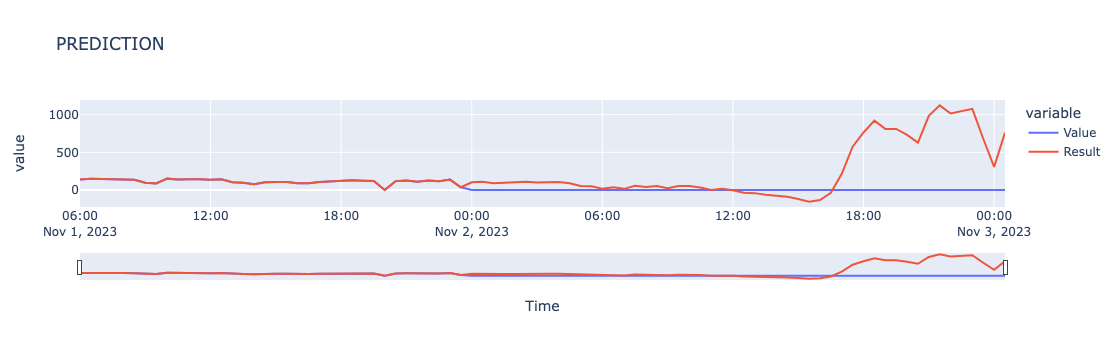

In [100]:
import plotly.express as px
time_valid = np.array(time_valid)
x_valid = np.array(x_valid)
    # creating a dataframe
df = pd.DataFrame({"Time": time_valid, "Value": x_valid, "Result": results})
    # plotting the dataframe
fig = px.line(df, x="Time", y=["Value", "Result"], title="PREDICTION")
fig.update_xaxes(rangeslider_visible=True)

/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



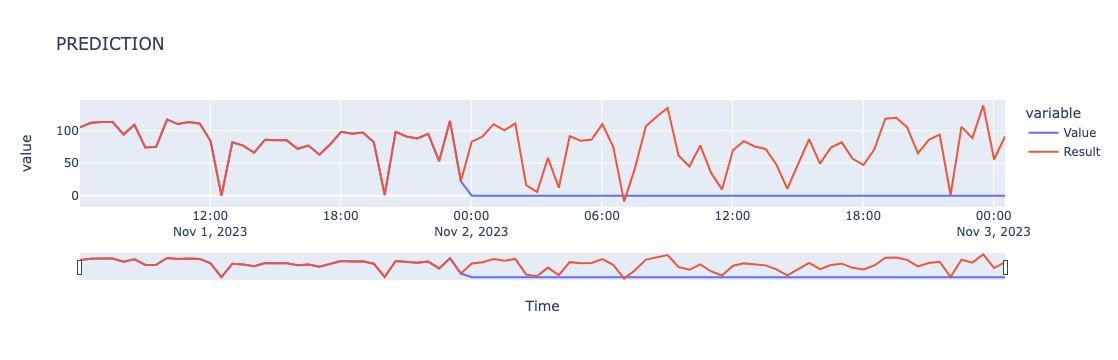

In [125]:
import plotly.express as px
time_valid = np.array(time_valid)
x_valid = np.array(x_valid)
    # creating a dataframe
df = pd.DataFrame({"Time": time_valid, "Value": x_valid, "Result": results})
    # plotting the dataframe
fig = px.line(df, x="Time", y=["Value", "Result"], title="PREDICTION")
fig.update_xaxes(rangeslider_visible=True)